In [2]:
%load_ext autoreload
%autoreload 2
from sensitivity_analysis_2_0 import sensitivity_analysis
from TOPSIS_main_data_processing import main_data_processing
from plotting_results_function import results_visualization
from gathering_data_function import gathering_data
from saving_results_function import directory_creation, save_run_results, save_sensitivity_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following code snippet run a function that gathers all the necessary data to run the simulation.

1. Loads the Excel or CSV file into a dataframe.
2. User defines the beneficial or non-beneficial nature of all criteria.
3. User assigns a weight (1-10) for each criterion.
4. Normalizes the weights.

Argument:
    file_path (str) : path of the Excel or CSV file.

Returns:
    decision_matrix (dataframe) : data array containing all the alternatives and their evaluations for each criterion.
    data_filename (str) : name of the file.
    weights (dict) : 

In [3]:
decision_matrix, data_filename, weights, normalized_weights, beneficial_criteria, non_beneficial_criteria = gathering_data(
    'C:/Users/Virgi/OneDrive/Bureau/MODM_tool_project/TOPSIS/data_input/mock4_data.csv')

             Criterion_1  Criterion_2  Criterion_3  Criterion_4
Alternative                                                    
Option_A             7.5          8.2          6.9          7.3
Option_B             7.2          8.5          7.1          7.4
Option_C             7.4          8.3          7.0          7.2
Option_D             7.3          8.4          7.2          7.1
Option_E             7.6          8.1          6.8          7.5


Is 'Criterion_1' beneficial (maximize) or non-beneficial (minimize)? Enter 'b' for beneficial or 'n' for non-beneficial:  n
Is 'Criterion_2' beneficial (maximize) or non-beneficial (minimize)? Enter 'b' for beneficial or 'n' for non-beneficial:  b
Is 'Criterion_3' beneficial (maximize) or non-beneficial (minimize)? Enter 'b' for beneficial or 'n' for non-beneficial:  b
Is 'Criterion_4' beneficial (maximize) or non-beneficial (minimize)? Enter 'b' for beneficial or 'n' for non-beneficial:  n
Please assign a weight (1-10) for Criterion_1 (1 being the least important weight and 10 being the most important weight):  e


Please enter a valid integer.


Please assign a weight (1-10) for Criterion_1 (1 being the least important weight and 10 being the most important weight):  4
Please assign a weight (1-10) for Criterion_2 (1 being the least important weight and 10 being the most important weight):  5
Please assign a weight (1-10) for Criterion_3 (1 being the least important weight and 10 being the most important weight):  6
Please assign a weight (1-10) for Criterion_4 (1 being the least important weight and 10 being the most important weight):  7


The following code snippet asks the user if he wants to save the results of the run and creates a new directory in the folder 'results' is the answer is 'yes'.

In [6]:
user_input = input(
    "Do you want to save the results of this run? (yes/no): ").strip().lower()
directory = None
if user_input == 'yes':
    directory = directory_creation(data_filename)

Do you want to save the results of this run? (yes/no):  no


The following code snippet processes the main calculations of the TOPSIS method.

In [4]:
ranked_alternatives, ranks, weighted_normalized_matrix, S = main_data_processing(
    decision_matrix, normalized_weights, beneficial_criteria)

The following code snippet plots the results of the run


Ranked Alternatives:
Alternative
Option_D    0.875444
Option_C    0.593712
Option_B    0.585740
Option_A    0.358789
Option_E    0.000000
dtype: float64


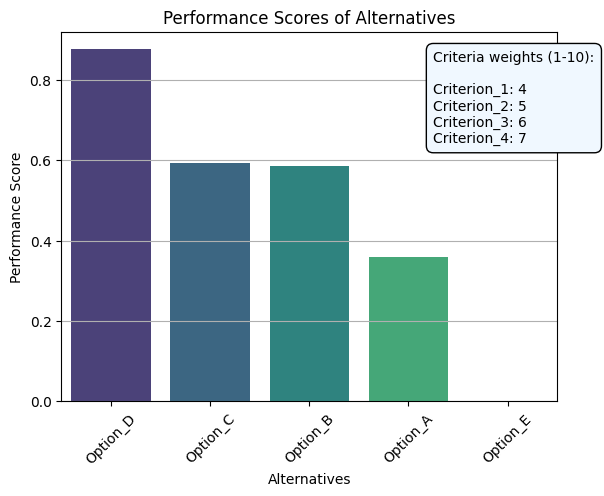

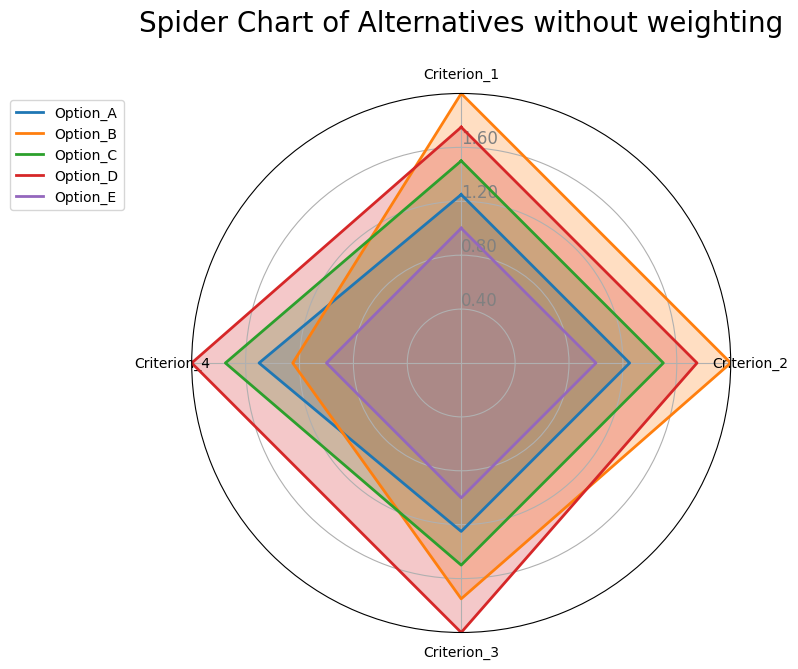

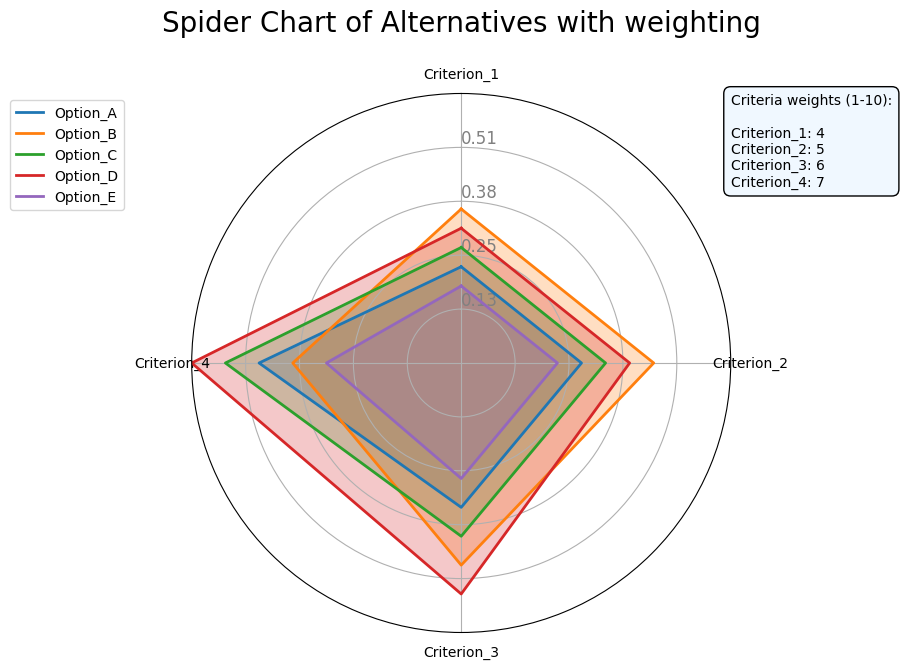

In [7]:
results_visualization(
    ranked_alternatives,
    weighted_normalized_matrix,
    beneficial_criteria,
    weights,
    normalized_weights,
    S,
    user_input,
    directory,
    decision_matrix)

The following code snippet asks the user if he wants to run a sensitivity analysis and runs it if the answer is 'yes'.

In [ ]:
user_input2 = input(
    "Do you want to run a sensitivity analysis? (yes/no): ").strip().lower()
if user_input2 == 'yes':
    uncertainties, scores_df, ranks_df, reliability_percentage, initial_best_solution = sensitivity_analysis(
        main_data_processing, weights, 10000, 100, 0, 10, decision_matrix, beneficial_criteria, S, user_input, directory)

The following code snippet saves the results

In [13]:
if user_input == 'yes':
    save_run_results(
        directory,
        decision_matrix,
        weighted_normalized_matrix,
        ranked_alternatives,
        weights,
        beneficial_criteria,
        non_beneficial_criteria,
    )
    
if user_input2 == 'yes' and user_input == 'yes':
    save_sensitivity_results(
        directory,
        uncertainties,
        scores_df,
        ranks_df,
        reliability_percentage,
        initial_best_solution)